# Clustering Documents

http://scikit-learn.org/stable/auto_examples/text/document_clustering.html
        

In [1]:
"""
import os
os.chdir('C:\Users\Alexis\Documents\Mineria de datos Primera descarga trabajo IOT')
print os.getcwd()
"""
import nltk
from nltk import sent_tokenize, word_tokenize
import glob
import codecs
from nltk import word_tokenize, FreqDist
from math import log
import nltk
import string
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn import metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#### Sample n=6415

In [3]:
path_prep_sample_files = 'TextResults/'
path_prep_files = 'TextResults_full/'
all_files =  glob.glob(path_prep_files+'*.txt')
sample_files =  glob.glob(path_prep_sample_files+'*.txt')

print "Total:",len(all_files)
print "Sample:",len(sample_files)

Total: 25899
Sample: 6415


## Create corpus tf-idf

### Total Documents

time preprocessing: 108.497999907

Dimentions tf-idf (25899, 216726)

In [3]:
token_dict = {}

#path = 'TextResults_full/'
path = 'TextResults/'
i=0
for subdir, dirs, files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        shakes = codecs.open(file_path, encoding='utf-8', errors='ignore')
        text = shakes.read()
        token_dict[file] = text
        i+=1
        #print i,file

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return  tokens

start = time.time()
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())
end = time.time()
print "time preprocessing:",end-start
print "Dimensiones tf-idf",tfs.shape


time preprocessing: 52.6270000935
Dimensiones tf-idf (6415, 90408)


### K- means

Parameters for sample (6415)

init='k-means++', n_clusters=10, n_init=10

n_jobs=-1 (4 cores. Time execution: 59.21)

n_jobs=1  (1 core. Time execution: 144.74)

#### Complete corpus

In [4]:
start = time.time()
kmeans = KMeans(init='k-means++', n_clusters=18, n_init=10, n_jobs=-1)
kmeans_fit=kmeans.fit(tfs)
end = time.time()
print end-start

128.894999981


<img src="https://github.com/Yagwar/TAMD/blob/master/full%202.PNG?raw=true">

In [4]:
start = time.time()
labels = kmeans_fit.labels_
silhouette=metrics.silhouette_score(tfs, labels, metric='euclidean')
end = time.time()
print end-start
print "Score:",silhouette

1086.9519999
Score: 0.12002729641


<img src="https://github.com/Yagwar/TAMD/blob/master/silhouette.PNG?raw=true">

#### Identifying the best K

In [ ]:
k_range = range(2,65,3)

start = time.time()
# Fit the kmeans model for each n_clusters = k
k_means_var = [KMeans(init='k-means++', n_clusters=k, n_init=10, n_jobs=-1).fit(tfs) for k in k_range]
Res_Silhouette=[metrics.silhouette_score(tfs, cluster.labels_, metric='euclidean') for cluster in k_means_var]
end = time.time()
print "time processing range:",end-start
Res_Silhouette

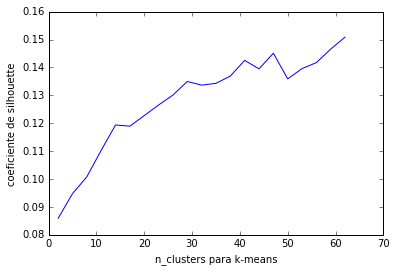

In [15]:
k_range = range(2,65,3)
Res_Silhouette=[0.085957614750161199,0.094773363193297738,0.10081600345660363,0.11031168155298694,0.11938710225098438,0.11897956105075121,0.12275568625396599,0.12656288376889119,0.13011650609641656,0.13499090215597626,0.13367151380218861,0.1343220278299061,0.13691933645861112,0.14255573118725087,0.13950446043865483,0.14511686346382002,0.13593525991048822,0.13960314936526319,0.14176217329078822,0.14661756225176911,0.15090043375231807]
%matplotlib inline 
plt.plot(k_range, Res_Silhouette,"-")
plt.xlabel("n_clusters para k-means")
plt.ylabel("coeficiente de silhouette")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.decomposition import PCA
reduced_data = PCA(2).fit_transform(tfs.toarray())
pca_clustering = KMeans(init='k-means++', n_clusters=10, n_init=10, n_jobs=-1).fit(reduced_data)

### DBSCAN

In [5]:
t0 = time.time()
db = DBSCAN(eps=0.3, min_samples=20).fit(tfs)
t1=time.time()
print t1-t0

11.0789999962


In [9]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfs, labels))


Estimated number of clusters: 5
Silhouette Coefficient: 0.083
